# LeSimpson

## Intro

This proyect aims to train a CNN model for image prediction on Simpsons Characters.
Steps to reproduce the notebook:

- Create environment: `conda env create`
- Activate: `conda activate le-simpson`
- Set Kaggle account in `~/.kaggle/kaggle.json`
- Start notebook: `jupyter notebook LeSimpson.ipynb`

## Load and Pre-Process Dataset

First, we need to load the dataset from Kaggle. Then we need to clean a little bit this images, some of the labels do not have enough data to train our model, others have too many and we need to train our model with a nice data quality.

### Define our paths

In [10]:
# PATHS
DATASET_PATH = 'the-simpsons-characters-dataset/'
TRAINSET_PATH = DATASET_PATH + 'simpsons_dataset/'
TESTSET_PATH = DATASET_PATH + 'kaggle_simpson_testset/kaggle_simpson_testset/'

### Download and unzip Dataset (if necessary)

In [11]:
import os
if not (os.path.isdir(DATASET_PATH)):
    from kaggle.api.kaggle_api_extended import KaggleApi
    
    api = KaggleApi()
    api.authenticate()
    api.dataset_download_files("alexattia/the-simpsons-characters-dataset")
    
    !!unzip the-simpsons-characters-dataset.zip -d the-simpsons-characters-dataset

### Define labels

In [42]:
LABELS = os.listdir(TRAINSET_PATH)
print(LABELS)

['maggie_simpson', 'simpsons_dataset', 'charles_montgomery_burns', 'patty_bouvier', 'ralph_wiggum', 'chief_wiggum', 'milhouse_van_houten', 'rainier_wolfcastle', 'cletus_spuckler', 'martin_prince', 'lenny_leonard', 'sideshow_bob', 'fat_tony', 'selma_bouvier', 'barney_gumble', 'lionel_hutz', 'gil', 'moe_szyslak', 'carl_carlson', 'edna_krabappel', 'snake_jailbird', 'groundskeeper_willie', 'sideshow_mel', 'ned_flanders', 'abraham_grampa_simpson', 'krusty_the_clown', 'waylon_smithers', 'apu_nahasapeemapetilon', 'marge_simpson', 'comic_book_guy', 'nelson_muntz', 'mayor_quimby', 'kent_brockman', 'professor_john_frink', 'principal_skinner', 'bart_simpson', 'lisa_simpson', 'otto_mann', 'troy_mcclure', 'miss_hoover', 'disco_stu', 'homer_simpson', 'agnes_skinner']


### Get stats from our Dataset

We need to learn some stats from the Dataset we have, to be able to clean the data and get fresh for the model.

In [46]:
import numpy as np
import scipy as sc

# Get the image count for every label
count = [len(os.listdir(TRAINSET_PATH + l)) for l in LABELS]
count = np.array(size_by_label)

# Get importants stats from this array
mean = np.mean(count)
sd = np.std(count)
print("[Mean] -> {}".format(mean))
print("[Std Deviation] -> {}".format(sd))

print("[Stats description] -> {}".format(sc.stats.describe(count)))

[Mean] -> 487.7906976744186
[Std Deviation] -> 567.7693422156381
[Stats description] -> DescribeResult(nobs=43, minmax=(3, 2246), mean=487.7906976744186, variance=330037.3122923587, skewness=1.1073543726660533, kurtosis=0.26996059762136726)


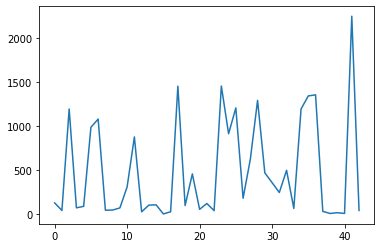

In [57]:
import matplotlib.pyplot as plt

plt.plot(count)
plt.show()

### Stats analisis

As we can see, we have a very high standard deviation in terms of *image count per label*, this will produce bad results with our data (overfitting for example).

In order to clean our dataset and make it more fit for our model, we need to reduce the labels that have too much images, and the ones that don't have enough.

### Remove extra labels